In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

# RD:

## 1D:

In [55]:
@njit
def RD(N, L):
  h = np.zeros(L)
  h_mean = np.empty(N)
  w = np.empty(N)

  for t in range(N):
    i = np.random.randint(L)
    h[i] += 1
    h_mean[t] = np.mean(h)
    w[t] = np.sqrt(np.sum((h - h_mean[t])**2) / L)

  return w

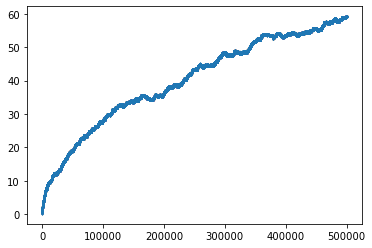

In [62]:
N = 500000
L = 128

w = RD(N, L)

plt.scatter(range(N), w, marker='.', s=1)
# plt.loglog()

# RDR:

## 2D:

In [52]:
def RDR(N, L):
  h = np.zeros((L, L))
  h_mean = np.empty(N)
  w = np.empty(N)

  for t in range(N):
    i = np.random.randint(L)
    j = np.random.randint(L)
    
    neighbors = np.array([h[(i - 1) % L][j], h[(i + 1) % L][j], h[i][(j - 1) % L], h[i][(j + 1) % L], h[i][j]])
    arg = np.where(neighbors == neighbors.min())[0]
    arg = np.random.choice(arg,1)
    
    if arg == 0:
      h[(i - 1) % L][j] += 1
    elif arg == 1:
      h[(i + 1) % L][j] += 1
    elif arg == 2:
      h[i][(j - 1) % L] += 1
    elif arg == 3:
      h[i][(j + 1) % L] += 1
    else:
      h[i][j] += 1
    
    h_mean[t] = np.mean(h)
    w[t] = np.sqrt(np.sum((h - h_mean[t])**2) / (L**2))

  return w

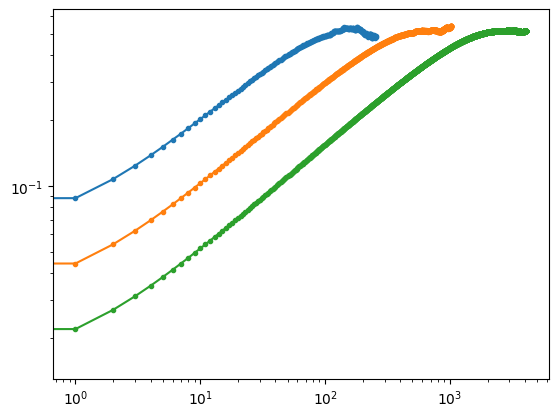

In [53]:
for L in [16, 32, 64]:
    w = RDR(L**2, L)

    plt.plot(w, marker='.')

plt.loglog()
plt.show()

# BD (or KPZ)

## 1D:

In [6]:
@njit
def BD_1D(N, L):
  h = np.zeros(L)
  h_mean = np.empty(N)
  w = np.empty(N)

  for t in range(N):
    i = np.random.randint(L)
    h[i] = max([h[(i - 1) % L], h[(i + 1) % L], h[i] + 1])
    h_mean[t] = np.mean(h)
    w[t] = np.sqrt(np.sum((h - h_mean[t])**2) / (L**2))

  return w

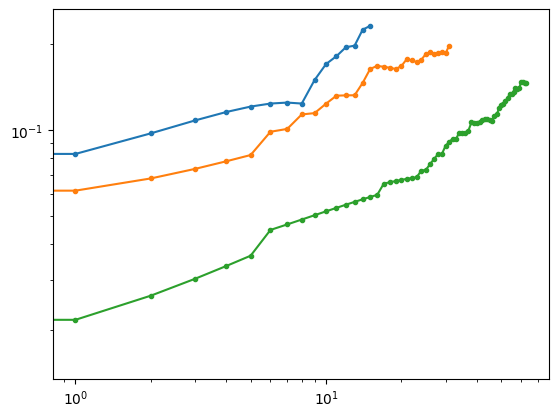

In [16]:
# N = 50000

for L in [16, 32, 64]:
    w = BD_1D(L, L)

    plt.plot(w, marker='.')

plt.loglog()
plt.show()

## 2D:

In [18]:
@njit
def BD(N, L):
  h = np.zeros((L, L))
  h_mean = np.empty(N)
  w = np.empty(N)

  for t in range(N):
    i = np.random.randint(L)
    j = np.random.randint(L)
    h[i][j] = max([h[(i - 1) % L][j], h[(i + 1) % L][j], h[i][(j - 1) % L], h[i][(j + 1) % L], h[i][j] + 1])
    h_mean[t] = np.mean(h)
    w[t] = np.sqrt(np.sum((h - h_mean[t])**2))

  return w

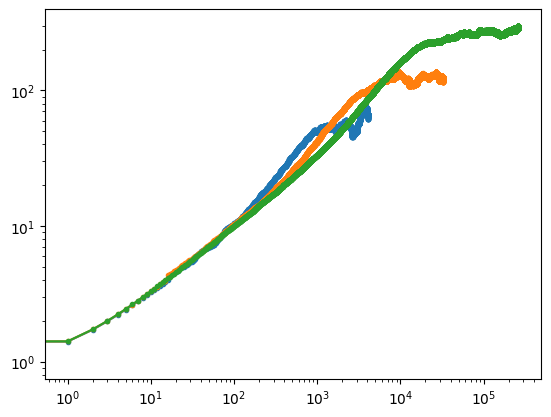

In [19]:
# N = 50000

for L in [16, 32, 64]:
    w = BD(L**3, L)

    plt.plot(w, marker='.')

plt.loglog()
plt.show()